In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned_data_train.csv')
df

,protocolSection_identificationModule_nctId,primary_study_duration_days,study_duration_days,primary_eq_bins,study_eq_bins,study_eq_labels,primary_eq_labels,number_of_conditions,number_of_groups,age_group,...,dor_outcome_measure,ae_outcome_measure,primary_max_days,secondary_max_days,max_treatment_duration,min_treatment_duration,survival_5yr_relative,conditions_category_num,phase_PHASE2_ PHASE3,phase_PHASE3
0,NCT01646437,2951.0,3377.0,"(1700.2, 4538.0]","(2211.0, 4722.0]",4,4,3,3,1,...,0,0,9125.0,9125.0,4320,14,0.680,11,False,True
1,NCT03299244,694.0,694.0,"(554.0, 859.8]","(677.0, 1131.0]",1,1,2,2,1,...,0,0,NaN,NaN,1080,360,0.175,2,False,True
2,NCT03306394,1504.0,1504.0,"(1183.8, 1700.2]","(1131.0, 1604.2]",2,3,1,1,1,...,0,1,84.0,84.0,1080,360,0.175,2,False,True
3,NCT02776683,847.0,847.0,"(554.0, 859.8]","(677.0, 1131.0]",1,1,1,1,1,...,1,1,574.0,574.0,1080,360,0.175,2,False,True
4,NCT06107790,1353.0,1353.0,"(1183.8, 1700.2]","(1131.0, 1604.2]",2,3,1,2,1,...,0,1,NaN,21.0,1825,365,0.990,5,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,NCT03070899,1090.0,1453.0,"(859.8, 1183.8]","(1131.0, 1604.2]",2,2,2,5,1,...,0,0,NaN,NaN,4320,14,0.680,11,False,True
1133,NCT04213677,925.0,956.0,"(859.8, 1183.8]","(677.0, 1131.0]",1,2,1,2,1,...,0,0,84.0,84.0,4320,14,0.680,11,False,True
1134,NCT03103087,756.0,1190.0,"(554.0, 859.8]","(1131.0, 1604.2]",2,1,2,3,1,...,0,1,35.0,168.0,4320,14,0.680,11,False,True
1135,NCT02321397,486.0,670.0,"(19.999, 554.0]","(90.999, 677.0]",0,0,2,2,1,...,0,1,1.0,245.0,4320,14,0.680,10,True,False


In [3]:
numeric_cols = df.select_dtypes(include=['float16', 'float32', 'float64', 'int', 'int32', 'int64', 'bool']).columns
temp = df[numeric_cols]

In [17]:
temp.dtypes

primary_study_duration_days     float64
study_duration_days             float64
study_eq_labels                   int64
primary_eq_labels                 int64
number_of_conditions              int64
number_of_groups                  int64
age_group                         int64
num_locations                   float64
location                        float64
num_inclusion                   float64
num_exclusion                   float64
number_of_intervention_types      int64
sponsor_type                      int64
intervention_model              float64
resp_party                        int64
has_dmc                         float64
allocation                      float64
masking                         float64
enroll_count                    float64
healthy_vol                        bool
treatment_purpose                 int64
diagnostic_purpose                int64
prevention_purpose                int64
supportive_purpose                int64
procedure_intervention            int64


In [15]:
df.dtypes

protocolSection_identificationModule_nctId     object
primary_study_duration_days                   float64
study_duration_days                           float64
primary_eq_bins                                object
study_eq_bins                                  object
study_eq_labels                                 int64
primary_eq_labels                               int64
number_of_conditions                            int64
number_of_groups                                int64
age_group                                       int64
num_locations                                 float64
location                                      float64
num_inclusion                                 float64
num_exclusion                                 float64
number_of_intervention_types                    int64
sponsor_type                                    int64
intervention_model                            float64
resp_party                                      int64
has_dmc                     

In [4]:
def drop_outliers(df, threshold=5):
    # Calculate the mean and standard deviation for each column
    means = df.mean()
    stds = df.std()
    
    # Identify outliers
    outliers = (np.abs((df - means) / stds) > threshold)
    
    # Create a DataFrame to store the outliers
    dropped_values = df[outliers]
    
    # Drop the rows with outliers
    df_cleaned = df.drop(index=dropped_values.dropna(how='all').index)
    
    # Visualize the dropped values
    for column in df.columns:
        outlier_column_values = dropped_values[column].dropna()
        if not outlier_column_values.empty:
            plt.figure(figsize=(10, 6))
            plt.title(f'Outliers in {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.hist(outlier_column_values, bins=30, color='red', alpha=0.7)
            plt.show()
    
    return df_cleaned

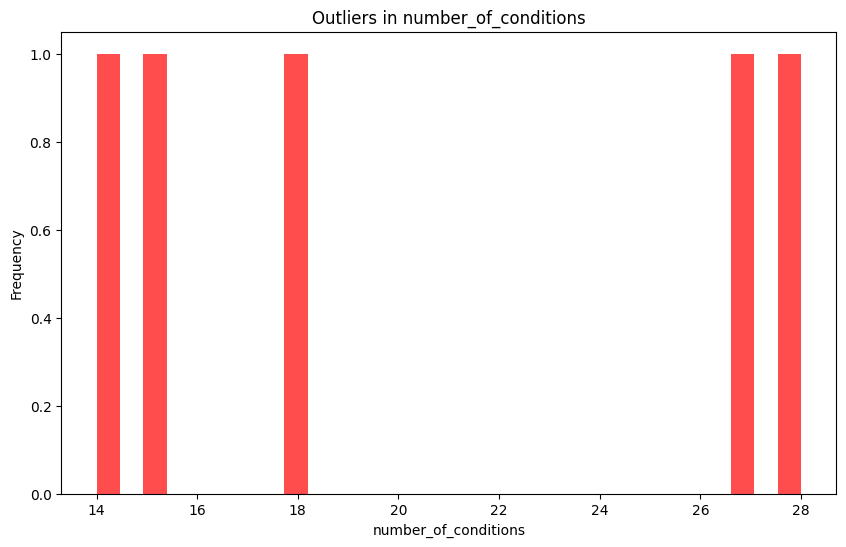

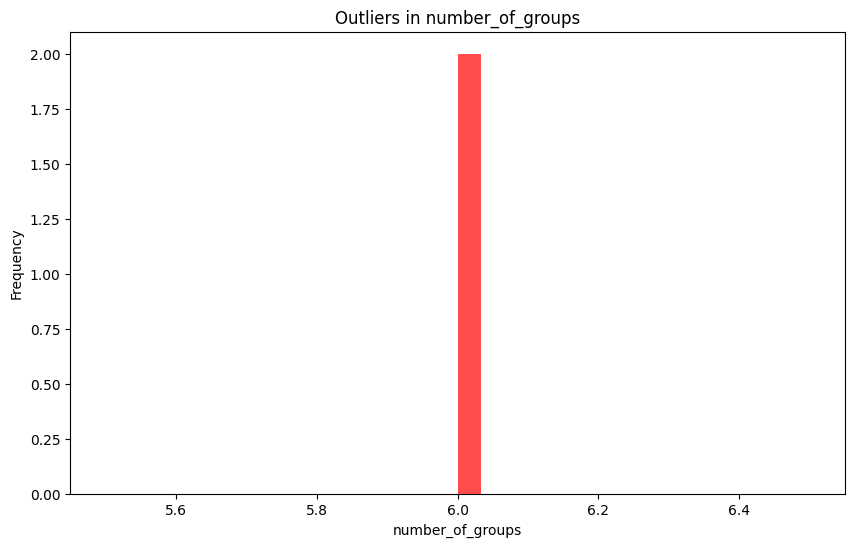

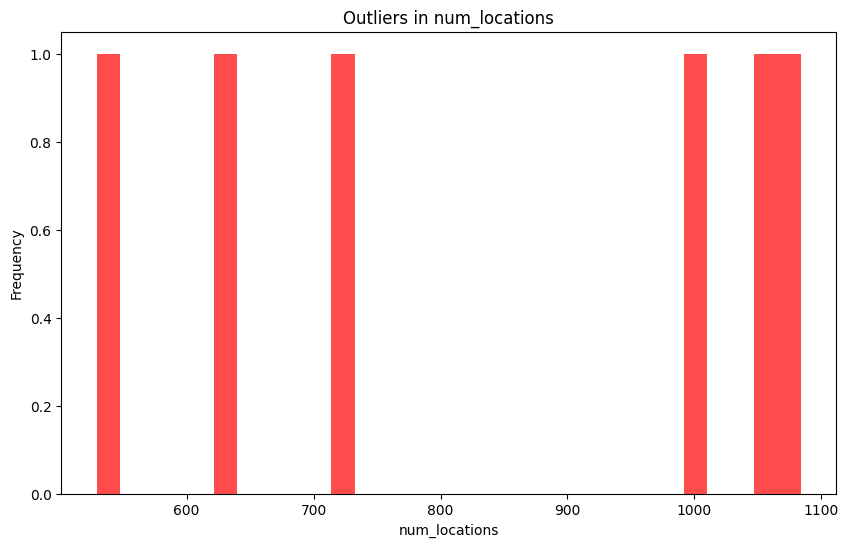

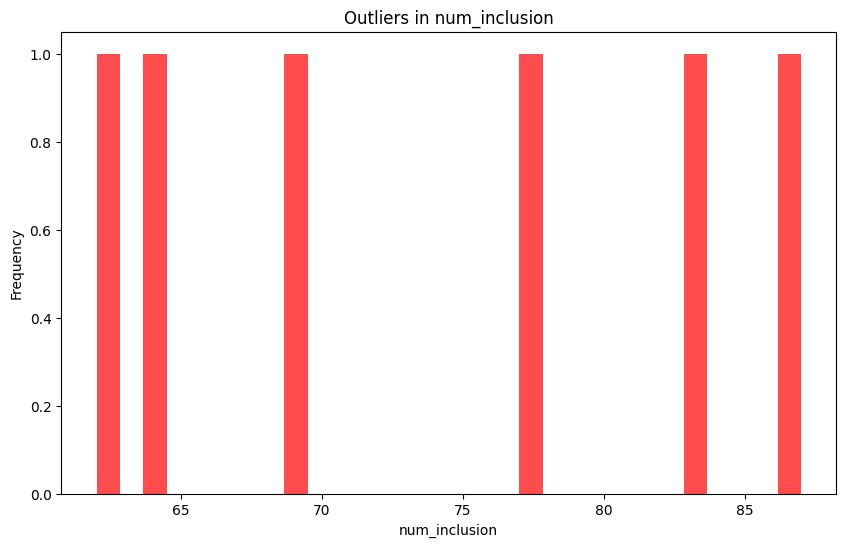

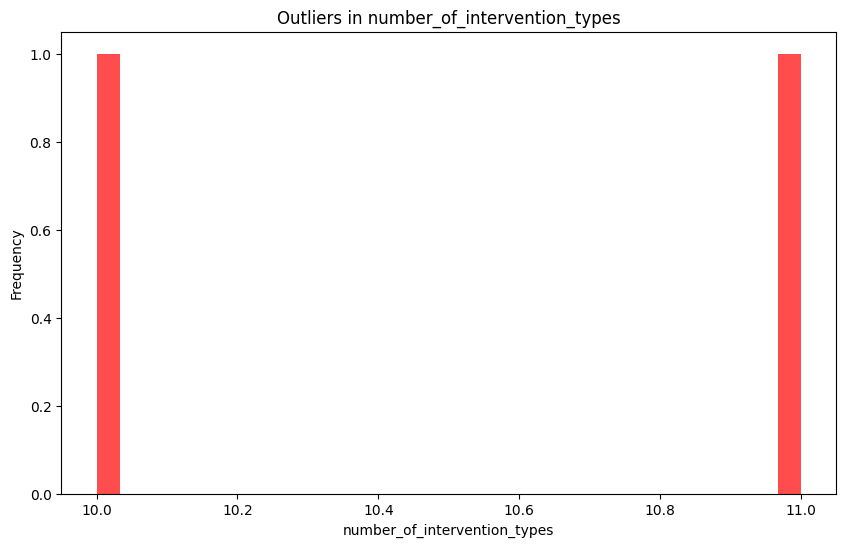

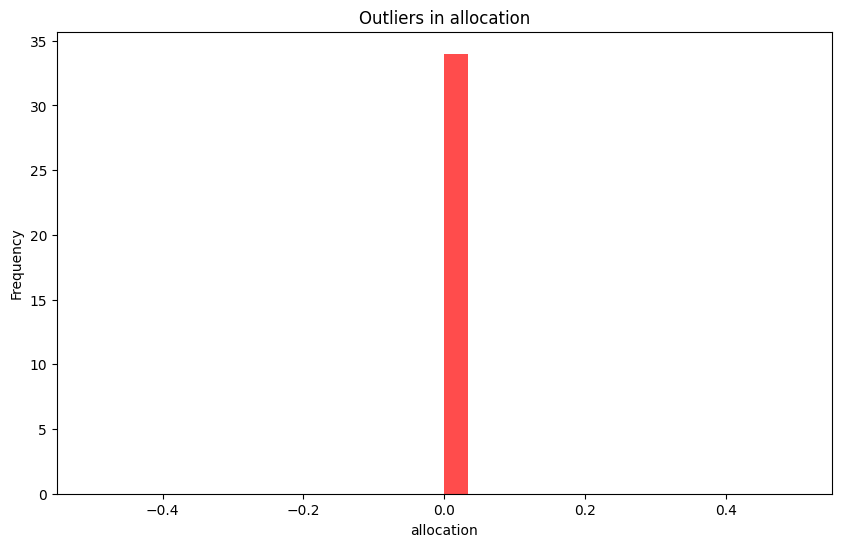

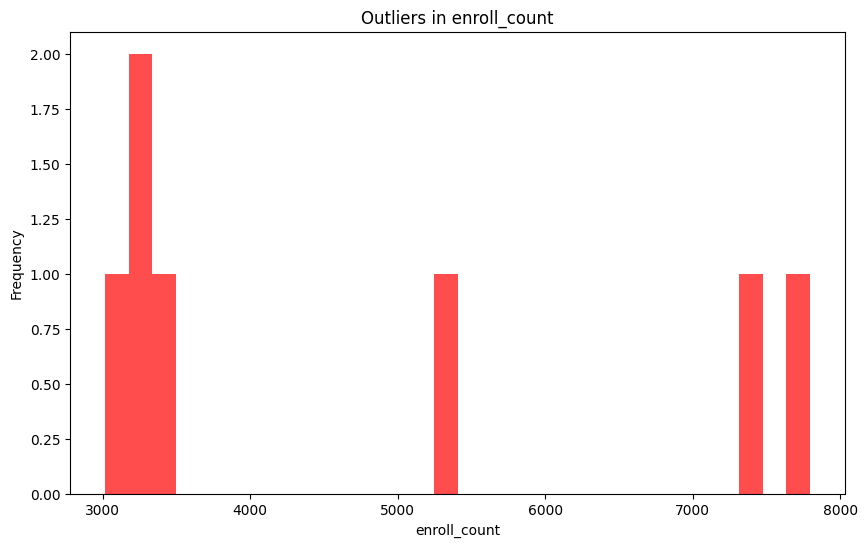

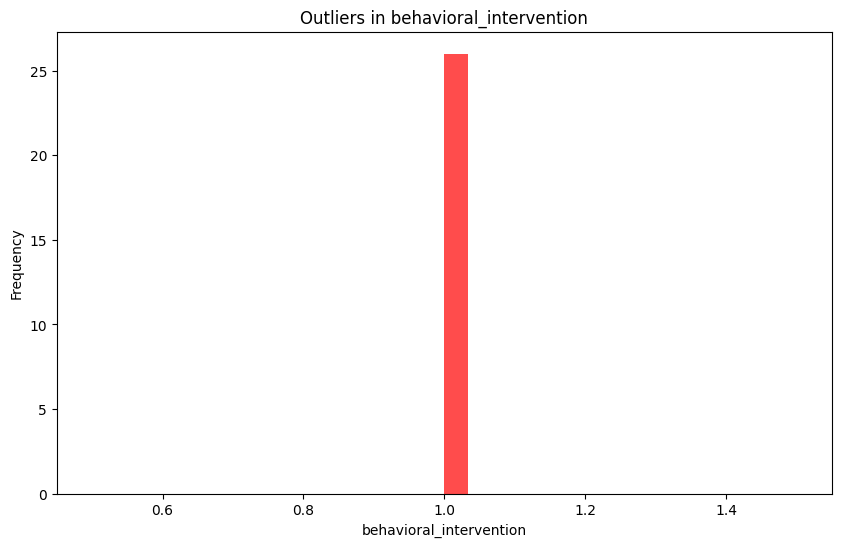

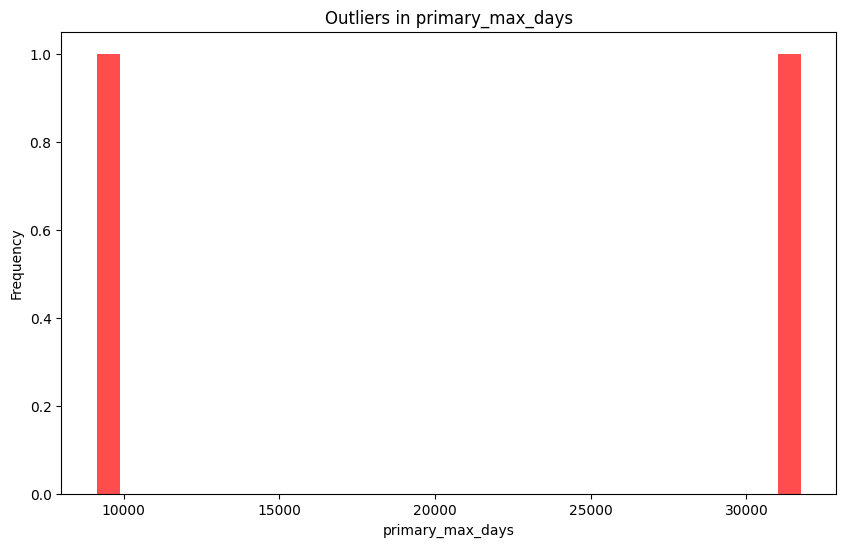

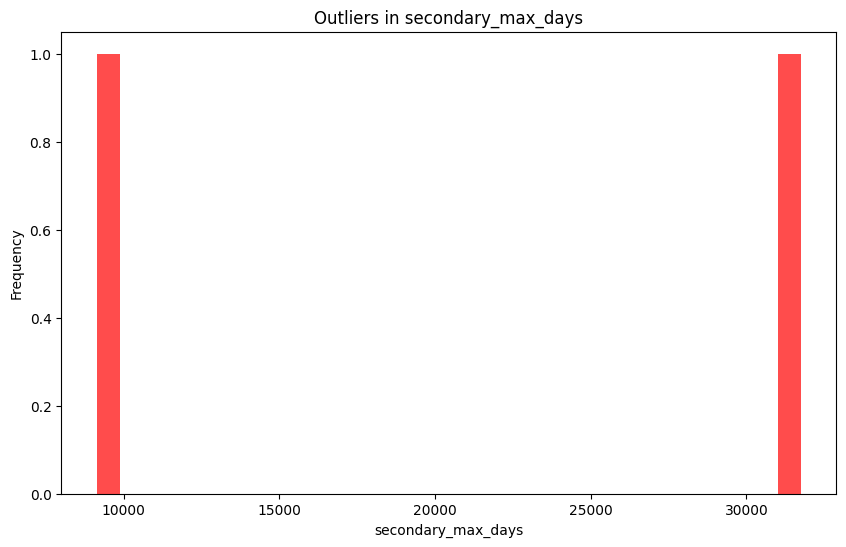

In [5]:
df_cleaned = drop_outliers(temp)

In [19]:
df_cleaned

,primary_study_duration_days,study_duration_days,study_eq_labels,primary_eq_labels,number_of_conditions,number_of_groups,age_group,num_locations,location,num_inclusion,...,dor_outcome_measure,ae_outcome_measure,primary_max_days,secondary_max_days,max_treatment_duration,min_treatment_duration,survival_5yr_relative,conditions_category_num,phase_PHASE2_ PHASE3,phase_PHASE3
1,694.0,694.0,1,1,2,2,1,90.0,1.0,10.0,...,0,0,NaN,NaN,1080,360,0.175,2,False,True
2,1504.0,1504.0,2,3,1,1,1,99.0,1.0,11.0,...,0,1,84.0,84.0,1080,360,0.175,2,False,True
3,847.0,847.0,1,1,1,1,1,46.0,2.0,7.0,...,1,1,574.0,574.0,1080,360,0.175,2,False,True
4,1353.0,1353.0,2,3,1,2,1,1.0,1.0,7.0,...,0,1,NaN,21.0,1825,365,0.990,5,False,True
5,955.0,955.0,1,2,1,1,1,5.0,1.0,9.0,...,0,0,NaN,NaN,4320,14,0.680,11,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,1090.0,1453.0,2,2,2,5,1,116.0,0.0,5.0,...,0,0,NaN,NaN,4320,14,0.680,11,False,True
1133,925.0,956.0,1,2,1,2,1,1.0,1.0,5.0,...,0,0,84.0,84.0,4320,14,0.680,11,False,True
1134,756.0,1190.0,2,1,2,3,1,127.0,2.0,4.0,...,0,1,35.0,168.0,4320,14,0.680,11,False,True
1135,486.0,670.0,0,0,2,2,1,0.0,1.0,6.0,...,0,1,1.0,245.0,4320,14,0.680,10,True,False


In [20]:
df_cleaned.isna().sum()

primary_study_duration_days       0
study_duration_days               0
study_eq_labels                   0
primary_eq_labels                 0
number_of_conditions              0
number_of_groups                  0
age_group                         0
num_locations                     0
location                          0
num_inclusion                     0
num_exclusion                     0
number_of_intervention_types      0
sponsor_type                      0
intervention_model                0
resp_party                        0
has_dmc                           0
allocation                        0
masking                           0
enroll_count                      0
healthy_vol                       0
treatment_purpose                 0
diagnostic_purpose                0
prevention_purpose                0
supportive_purpose                0
procedure_intervention            0
device_intervention               0
behavioral_intervention           0
drug_intervention           